<a href="https://colab.research.google.com/github/kanakesh2006/Langgraph_for_Agentic_AI_Concepts/blob/main/Sequential%20Workflows/simple_llm_sequential_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import userdata

os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')
os.environ['HUGGINGFACE_API_KEY'] = userdata.get('HUGGINGFACE_API_KEY')


In [ ]:
!pip install langchain langgraph langchain_google_genai langchain_community transformers

In [ ]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict

In [ ]:
# model = ChatGoogleGenerativeAI(model='gemini-2.0-flash')

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_community.llms import HuggingFacePipeline
from transformers import pipeline

pipe = pipeline(
    "text-generation",
    model="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    max_new_tokens=128
)

model = HuggingFacePipeline(pipeline=pipe)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Device set to use cpu
/tmp/ipython-input-1392739535.py:12: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFacePipeline``.
  model = HuggingFacePipeline(pipeline=pipe)


In [ ]:
# create a state

class LLMState(TypedDict):

  question : str
  answer : str


In [ ]:

# node functions

def llm_qa(state: LLMState) -> LLMState:

  # extract the question from state
  question = state['question']

  # form a system prompt
  prompt = f"Question: {question}\nAnswer:"

  # Invoke the prompt to a LLM
  answer = model.invoke(prompt)

  # update the state
  state['answer'] = answer

  return state

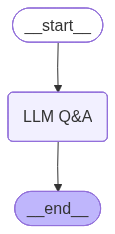

In [ ]:
# create a graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node('LLM Q&A', llm_qa)

# add edges
graph.add_edge(START, 'LLM Q&A')
graph.add_edge('LLM Q&A', END)

# compile graph
graph.compile()


In [ ]:
workflow = graph.compile()

initial_state = {'question': 'How far is the moon from the earth'}

final_state = workflow.invoke(initial_state)

print(final_state)

{'question': 'How far is the moon from the earth', 'answer': 'Question: How far is the moon from the earth\nAnswer: The moon is approximately 24,877,280 kilometers or 15,456,859 miles from the earth.'}
